In [2]:
%matplotlib inline
import os, shutil
import sys
sys.path.append("..")
import numpy as np
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import flopy as flopy
import pyemu

In [3]:
from apexmf import apexmf_pst_utils, apexmf_pst_viz
import apexmf
apexmf.__version__

'0.2.1'

In [4]:
wd = "C:\\Users\\Lizmot34\\Desktop\\Calib-Model\\EM_RBF_v03_Ani\\EM_RBF_v03_Ani"

In [5]:
os.chdir(wd)

In [6]:
pstfile = 'ani_salt_pest2.pst'

In [7]:
pestoutfile = 'ani_salt_pest_rw.pst'

In [8]:
pst = pyemu.Pst(os.path.join(wd,pestoutfile))
pst.phi

1003440472847754.2

In [9]:
pst.res.loc[pst.nnz_obs_names,:]

,name,group,measured,modelled,residual,weight,weight*measured,weight*modelled,weight*residual,measurement_sd,natural_weight
name,,,,,,,,,,,
d009_cca_19961119,d009_cca_19961119,d009_cca,52.4,0.0,52.40,7131.250,373677.5,0.0,373677.50,66.49159,0.015039
d009_cca_19970108,d009_cca_19970108,d009_cca,56.1,0.0,56.10,7131.250,400063.1,0.0,400063.10,66.49159,0.015039
d009_cca_19970130,d009_cca_19970130,d009_cca,69.2,0.0,69.20,7131.250,493482.5,0.0,493482.50,66.49159,0.015039
d009_cca_19970225,d009_cca_19970225,d009_cca,60.1,0.0,60.10,7131.250,428588.1,0.0,428588.10,66.49159,0.015039
d009_cca_19970325,d009_cca_19970325,d009_cca,44.8,0.0,44.80,7131.250,319480.0,0.0,319480.00,66.49159,0.015039
...,...,...,...,...,...,...,...,...,...,...,...
m075_lso4_200906,m075_lso4_200906,m075_lso4,220707.0,262371.9,-41664.86,1.735,382926.6,455215.2,-72288.53,273295.80000,0.000004
m075_lso4_200912,m075_lso4_200912,m075_lso4,130089.0,230772.5,-100683.50,1.735,225704.4,400390.2,-174685.80,273295.80000,0.000004
m075_lso4_201005,m075_lso4_201005,m075_lso4,248012.0,374302.4,-126290.40,1.735,430300.8,649414.6,-219113.80,273295.80000,0.000004


## Check Phi Reduction

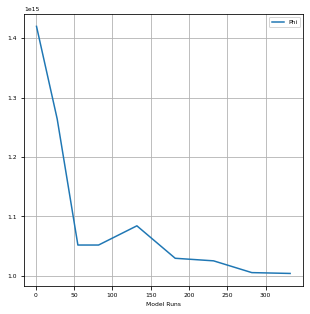

In [10]:
os.chdir(wd)
apexmf_pst_viz.phi_progress_plot(pestoutfile)

## Set File Paths

In [56]:
RecordFile = 'ani_salt_pest_rw.rec'
SensitivityFile = 'ani_salt_pest_rw.seo'

## Final Estimated Parameter Value

In [15]:
Par_PEST = pd.read_csv(RecordFile, skiprows = 5953, nrows = 23, delim_whitespace = True)

In [40]:
Param_PEST = Par_PEST.drop(['value'], axis=1)

In [41]:
Param_PEST

,Parameter,Estimated
0,aquf_caco3,1.048750
1,aquf_caso4,1.133590
2,aquf_mgso4,0.059668
3,init_ca,0.013049
4,init_cl,20.156100
5,init_cno3,50.000100
6,init_co3,60.494600
7,init_hco3,31.015600
8,init_k,12.363700
9,init_mg,0.065743


## Weights of Each Group

In [17]:
Obs_PEST = pd.read_csv(RecordFile, skiprows = 5983, nrows = 4487, delim_whitespace = True)

In [18]:
Obs_PEST

,Observation,Measured,Calculated,Residual,Weight,Group
0,value,value,NaN,NaN,NaN,NaN
1,d009_cca_19961119,52.4000,0.0,52.4,7131.000,d009_cca
2,d009_cca_19970108,56.1000,0.0,56.1,7131.000,d009_cca
3,d009_cca_19970130,69.2000,0.0,69.2,7131.000,d009_cca
4,d009_cca_19970225,60.1000,0.0,60.1,7131.000,d009_cca
...,...,...,...,...,...,...
4482,m075_lso4_200906,220707.,262372.0,-41664.9,1.735,m075_lso4
4483,m075_lso4_200912,130089.,230772.0,-100683.0,1.735,m075_lso4
4484,m075_lso4_201005,248012.,374302.0,-126290.0,1.735,m075_lso4
4485,m075_lso4_201007,116313.,246909.0,-130596.0,1.735,m075_lso4


In [21]:
Obsv_PEST = Obs_PEST.drop(0, axis = 0)

In [22]:
Obsv_PEST

,Observation,Measured,Calculated,Residual,Weight,Group
1,d009_cca_19961119,52.4000,0.0,52.4,7131.000,d009_cca
2,d009_cca_19970108,56.1000,0.0,56.1,7131.000,d009_cca
3,d009_cca_19970130,69.2000,0.0,69.2,7131.000,d009_cca
4,d009_cca_19970225,60.1000,0.0,60.1,7131.000,d009_cca
5,d009_cca_19970325,44.8000,0.0,44.8,7131.000,d009_cca
...,...,...,...,...,...,...
4482,m075_lso4_200906,220707.,262372.0,-41664.9,1.735,m075_lso4
4483,m075_lso4_200912,130089.,230772.0,-100683.0,1.735,m075_lso4
4484,m075_lso4_201005,248012.,374302.0,-126290.0,1.735,m075_lso4
4485,m075_lso4_201007,116313.,246909.0,-130596.0,1.735,m075_lso4


In [35]:
WObs = WeightedObs.groupby(['Group']).mean()

In [37]:
WeiObs = WObs.drop(['Calculated', 'Residual'], axis =1)

In [38]:
WeightedObs = WeiObs.sort_values(by = ['Weight'])

In [39]:
WeightedObs

,Weight
Group,
m075_lso4,1.735
d075_lso4,1.831
m075_lhco3,2.887
d075_lhco3,3.182
d012_lhco3,4.221
d012_lso4,6.757
m075_lmg,7.390
d075_lmg,7.911
m075_lca,8.216


## Contribution to phi

In [47]:
Obj_PEST = pd.read_csv(RecordFile,skiprows = 10478, nrows = 60, delim_whitespace = True, header = None)

In [48]:
Obj_PEST

,0,1,2,3,4,5,6,7,8
0,Sum,of,squared,weighted,residuals,(ie,phi),=,1.003440e+15
1,Contribution,to,phi,from,observation,group,d009_cca,=,4.408880e+12
2,Contribution,to,phi,from,observation,group,d009_ck,=,6.983230e+12
3,Contribution,to,phi,from,observation,group,d009_cmg,=,4.449050e+12
4,Contribution,to,phi,from,observation,group,d009_cna,=,1.286230e+13
5,Contribution,to,phi,from,observation,group,d009_cso4,=,4.611000e+12
6,Contribution,to,phi,from,observation,group,d009_lca,=,2.390170e+13
7,Contribution,to,phi,from,observation,group,d009_lk,=,2.380450e+13
8,Contribution,to,phi,from,observation,group,d009_lmg,=,2.392580e+13
9,Contribution,to,phi,from,observation,group,d009_lna,=,2.380530e+13


In [49]:
ObPest = Obj_PEST.drop([1,2,3,4,5,7], axis=1)

In [51]:
ObPest.columns = ['Item', 'Group', 'Value']

In [52]:
ObPest

,Item,Group,Value
0,Sum,phi),1.003440e+15
1,Contribution,d009_cca,4.408880e+12
2,Contribution,d009_ck,6.983230e+12
3,Contribution,d009_cmg,4.449050e+12
4,Contribution,d009_cna,1.286230e+13
5,Contribution,d009_cso4,4.611000e+12
6,Contribution,d009_lca,2.390170e+13
7,Contribution,d009_lk,2.380450e+13
8,Contribution,d009_lmg,2.392580e+13
9,Contribution,d009_lna,2.380530e+13


## Sensitivities

In [59]:
Sen_PEST = pd.read_csv(SensitivityFile, delim_whitespace = True)

In [60]:
Sen_PEST

,Observation,Group,Measured,Modelled,Sensitivity
0,d009_cca_19961119,d009_cca,5.240000e+01,0.000000,0.000000e+00
1,d009_cca_19970108,d009_cca,5.610000e+01,0.000000,0.000000e+00
2,d009_cca_19970130,d009_cca,6.920000e+01,0.000000,0.000000e+00
3,d009_cca_19970225,d009_cca,6.010000e+01,0.000000,0.000000e+00
4,d009_cca_19970325,d009_cca,4.480000e+01,0.000000,0.000000e+00
5,d009_cca_19970429,d009_cca,4.190000e+01,0.000000,0.000000e+00
6,d009_cca_19970514,d009_cca,2.490000e+01,0.012808,1.046882e-03
7,d009_cca_19970521,d009_cca,2.160000e+01,0.001841,4.774461e-03
8,d009_cca_19970529,d009_cca,2.710000e+01,0.878853,1.070559e-03
9,d009_cca_19970605,d009_cca,1.690000e+01,0.207835,6.182154e-04
